**Analysis of GPU Specifications and Benchmark Performance**

**Team Members: Sowmya Balaji, Sneha Nitnaware, Sonali Roy**

**Course: ISAN 5357 – Computing for Data Analytics**

**Professor: Dr. Zareef Mohammed**

**Objective**

**1. Introduction**

Graphics Processing Units (GPUs) power modern gaming, artificial intelligence and
high-performance computing. In recent years, performance has increased rapidly due to
improvements in architecture, memory, clock speeds, and efficiency. However, GPU prices,
power consumption, and specifications vary greatly, making it difficult to understand what
actually drives performance. The aim is to understand what factors influence GPU performance.

To guide this exploration, we frame the investigation around the following research questions.




**2. Research Questions:**

RQ-1 What hardware specifications (memory size, shader count, clock speeds, TDP) have the strongest impact on GPU performance metrics?

RQ-2 What is the relationship between GPU price and performance, and which GPUs offer the best performance-per-dollar value?

RQ-3 How does power consumption (TDP) relate to performance and efficiency?

RQ-4 Are newer GPUs (based on release year) showing consistent improvements in performance and efficiency trends over time?

RQ-5 How do different manufacturers (NVIDIA, AMD) compare in terms of average performance and efficiency?

This analysis uses descriptive analytics, correlation methods, trend analysis, and simple regression to uncover insights in a clear and interpretable way.

**3. Research Design**

**3.1 Dataset Description**
The dataset (`GPU_Metrics.csv`) contains GPU hardware specifications from NVIDIA and AMD.
Each row represents a unique GPU model with variables such as:

- **Performance metrics:** G3Dmark  
- **Core specifications:** shader count, memory size, GPU clock, memory clock  
- **Efficiency:** performance per watt, performance per dollar  
- **Power consumption:** TDP  
- **Release information:** manufacturer and release year  

**3.2 Data Types**
The dataset includes:
- **Numerical variables:** clock rates, shader counts, G3Dmark, efficiency, price  
- **Categorical variables:** manufacturer, GPU name  
- **Time variable:** release year  

**3.3 Plan for Analysis**
To answer the research questions, the analysis includes:
- Descriptive statistics  
- Brand-level comparisons  
- Scatterplots, line trends, piechart, barplots, heatmap  
- Correlation analysis  
- A simple linear regression model  

The objective is not just to analyze the dataset technically, but to tell a clear and
interpretable story about GPU performance.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

sns.set(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
df = pd.read_csv('GPU_Metrics.csv')
df.shape

(3525, 17)

In [3]:
sns.set(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (10, 6)

df.head()

,gpuName,G3Dmark,price,gpuValue,TDP,powerPerformance,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,Manufacturer,perf_per_watt,perf_per_dollar
0,GeForce RTX 3090 Ti,29094,2099.99,13.85,450.0,64.65,2022,24.0,384,1560,1313,10752,336,112,Nvidia,64.653333,13.854352
1,GeForce RTX 3090 Ti,29094,2099.99,13.85,450.0,64.65,2022,24.0,384,1980,1313,7168,224,80,Nvidia,64.653333,13.854352
2,GeForce RTX 3080 Ti,26887,1199.99,22.41,350.0,76.82,2021,12.0,384,1365,1188,10240,320,112,Nvidia,76.820000,22.406020
3,GeForce RTX 3080 Ti,26887,1199.99,22.41,350.0,76.82,2021,12.0,128,1607,1376,2560,160,64,Nvidia,76.820000,22.406020
4,GeForce RTX 3090,26395,1749.99,15.08,350.0,75.41,2020,24.0,384,1395,1219,10496,328,112,Nvidia,75.414286,15.082943


In [4]:
df.describe()

,G3Dmark,price,gpuValue,TDP,powerPerformance,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,perf_per_watt,perf_per_dollar
count,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000
mean,2148.695319,269.795027,7.886074,77.072340,24.356400,2011.627518,1.921096,154.389787,704.693050,934.487943,588.677447,36.688227,15.957163,23.551856,8.331696
std,3938.950385,435.078233,6.320674,52.796864,20.958684,3.640871,3.353834,220.765789,266.270779,327.556156,827.679320,43.482440,15.509055,33.492586,13.082282
min,1.000000,17.500000,0.000000,4.400000,0.630000,2000.000000,0.032000,32.000000,10.000000,10.000000,8.000000,0.000000,0.000000,0.015152,0.002002
25%,141.000000,199.990000,6.710000,66.000000,19.915000,2010.000000,1.024000,128.000000,600.000000,900.000000,384.000000,20.000000,8.000000,3.161905,0.785039
50%,655.000000,199.990000,6.710000,66.000000,19.915000,2012.000000,1.024000,128.000000,670.000000,900.000000,384.000000,24.000000,12.000000,11.257576,3.365168
75%,2001.000000,199.990000,6.710000,66.000000,19.915000,2013.000000,2.000000,128.000000,745.000000,900.000000,384.000000,32.000000,16.000000,28.766667,9.645482
max,29094.000000,8999.000000,69.730000,500.000000,204.000000,2022.000000,48.000000,4096.000000,2321.000000,2250.000000,10752.000000,336.000000,128.000000,245.984848,97.544877


In [ ]:
df.columns

Index(['gpuName', 'G3Dmark', 'price', 'gpuValue', 'TDP', 'powerPerformance',
       'releaseYear', 'memSize', 'memBusWidth', 'gpuClock', 'memClock',
       'unifiedShader', 'tmu', 'rop', 'Manufacturer', 'perf_per_watt',
       'perf_per_dollar'],
      dtype='object')

In [6]:
df.describe(include='all')

,gpuName,G3Dmark,price,gpuValue,TDP,powerPerformance,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,Manufacturer,perf_per_watt,perf_per_dollar
count,3525,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525,3525.000000,3525.000000
unique,2317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,ION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN
freq,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2289,NaN,NaN
mean,NaN,2148.695319,269.795027,7.886074,77.072340,24.356400,2011.627518,1.921096,154.389787,704.693050,934.487943,588.677447,36.688227,15.957163,NaN,23.551856,8.331696
std,NaN,3938.950385,435.078233,6.320674,52.796864,20.958684,3.640871,3.353834,220.765789,266.270779,327.556156,827.679320,43.482440,15.509055,NaN,33.492586,13.082282
min,NaN,1.000000,17.500000,0.000000,4.400000,0.630000,2000.000000,0.032000,32.000000,10.000000,10.000000,8.000000,0.000000,0.000000,NaN,0.015152,0.002002
25%,NaN,141.000000,199.990000,6.710000,66.000000,19.915000,2010.000000,1.024000,128.000000,600.000000,900.000000,384.000000,20.000000,8.000000,NaN,3.161905,0.785039
50%,NaN,655.000000,199.990000,6.710000,66.000000,19.915000,2012.000000,1.024000,128.000000,670.000000,900.000000,384.000000,24.000000,12.000000,NaN,11.257576,3.365168
75%,NaN,2001.000000,199.990000,6.710000,66.000000,19.915000,2013.000000,2.000000,128.000000,745.000000,900.000000,384.000000,32.000000,16.000000,NaN,28.766667,9.645482


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gpuName           3525 non-null   object 
 1   G3Dmark           3525 non-null   int64  
 2   price             3525 non-null   float64
 3   gpuValue          3525 non-null   float64
 4   TDP               3525 non-null   float64
 5   powerPerformance  3525 non-null   float64
 6   releaseYear       3525 non-null   int64  
 7   memSize           3525 non-null   float64
 8   memBusWidth       3525 non-null   int64  
 9   gpuClock          3525 non-null   int64  
 10  memClock          3525 non-null   int64  
 11  unifiedShader     3525 non-null   int64  
 12  tmu               3525 non-null   int64  
 13  rop               3525 non-null   int64  
 14  Manufacturer      3525 non-null   object 
 15  perf_per_watt     3525 non-null   float64
 16  perf_per_dollar   3525 non-null   float64


**RQ 1**

 What hardware specifications (memory size, shader count, clock speeds, TDP) have the strongest impact on GPU performance metrics?

 Below we explore relationships among architectural variables using correlation heatmaps and scatterplots.

1.1 Correlation Heatmap

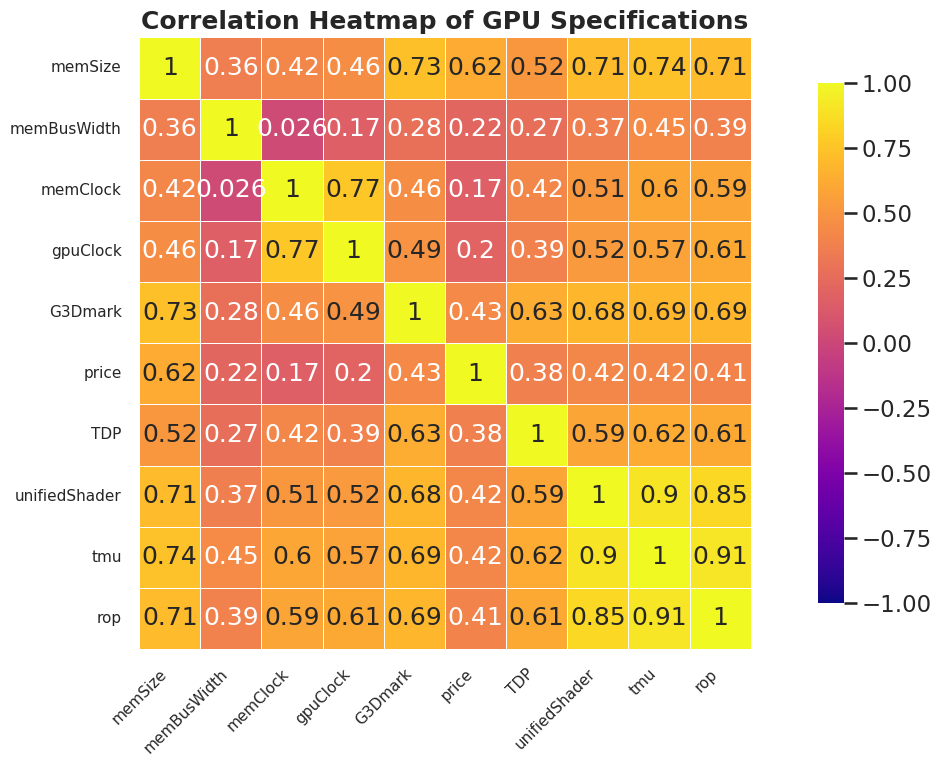

In [8]:
df1 = df[['memSize', 'memBusWidth', 'memClock','gpuClock','G3Dmark','price', 'TDP',
'unifiedShader', 'tmu', 'rop']]


plt.figure(figsize=(14, 8))
sns.heatmap(df1.corr(), annot=True, cmap='plasma', vmin=-1, vmax=1,
linewidths=0.5, linecolor='white', square=True,
cbar_kws={"shrink": 0.85})
plt.title('Correlation Heatmap of GPU Specifications', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

**Interpretation**

The heatmap displays the correlation values between key GPU specifications, with the scale ranging from –1 to 1, where values closer to 1 indicate strong positive relationships and values near 0 indicate weak or no correlation.

GPU performance (G3DMark) shows strong positive correlations with core architectural features- memory size, shader count, TMUs, and ROPs. These components tend to increase together and are the primary drivers of higher performance.

Clock speeds, TDP, and price exhibit moderate positive correlations with performance, indicating some influence but not as dominant as architecture. Memory bus width and a few other parameters display weaker correlations, suggesting limited direct impact.

Additionally, shader-related units (shaders, TMUs, ROPs) are highly inter-correlated, reflecting that GPU designs often scale these architectural components in parallel.

Overall, the heatmap clearly shows that architectural scale not just frequency, power, or cost is the strongest determinant of GPU performance.




**1.2 Memory Size vs Performance**

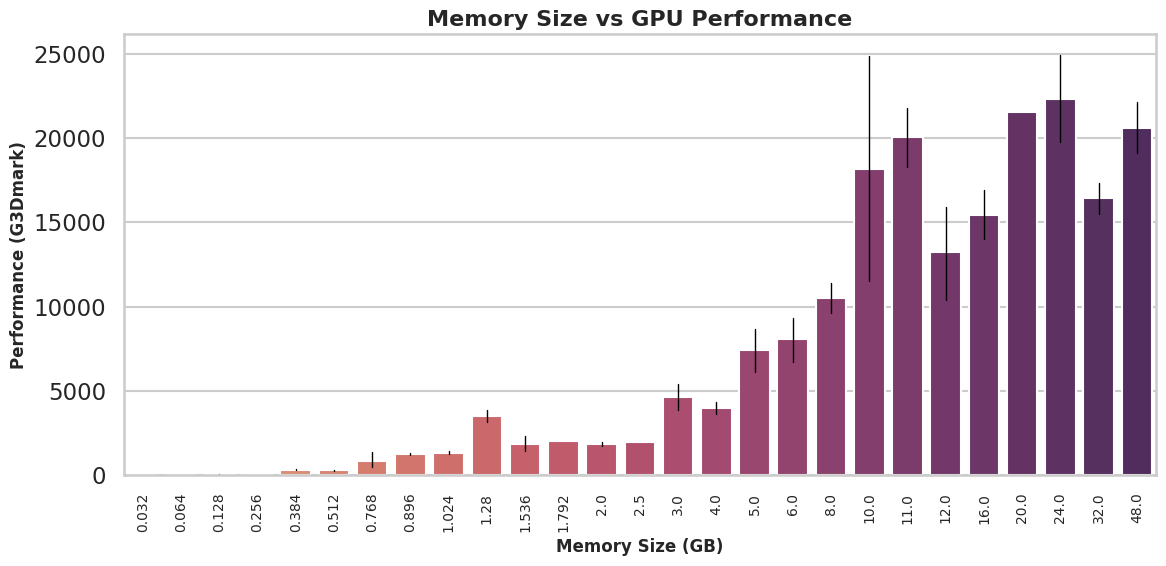

In [ ]:
plt.figure(figsize=(12,6))
colors = sns.color_palette("flare", n_colors=len(df['memSize'].unique()))
sns.barplot(data=df, x='memSize', y='G3Dmark', hue='memSize', palette=colors,
dodge=False, err_kws={'color':'black', 'linewidth':1})
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Memory Size (GB)", fontsize=12, fontweight='bold')
plt.ylabel("Performance (G3Dmark)", fontsize=12, fontweight='bold')
plt.title("Memory Size vs GPU Performance", fontsize=16, fontweight='bold')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

**Interpretation**

The chart is left skewed and unimodal shows a very clear pattern,as GPU memory size increases, overall performance (G3Dmark) rises sharply. GPUs with tiny memory pools (1–4 GB) barely register on the performance scale, while the heavyweights—10 GB, 12 GB, 16 GB, 20 GB, and above—deliver dramatically higher scores. Major increases occur at 8GB-10GB and 16GB-20GB. The vertical line represent the variation within each group.

There are a few bumps and dips, but the overall message is clear. More memory gives a GPU more room to breathe, handle larger workloads, and achieve higher benchmark scores.

**1.3 3D Plot: Clock Speed vs Shader Count vs Performance**

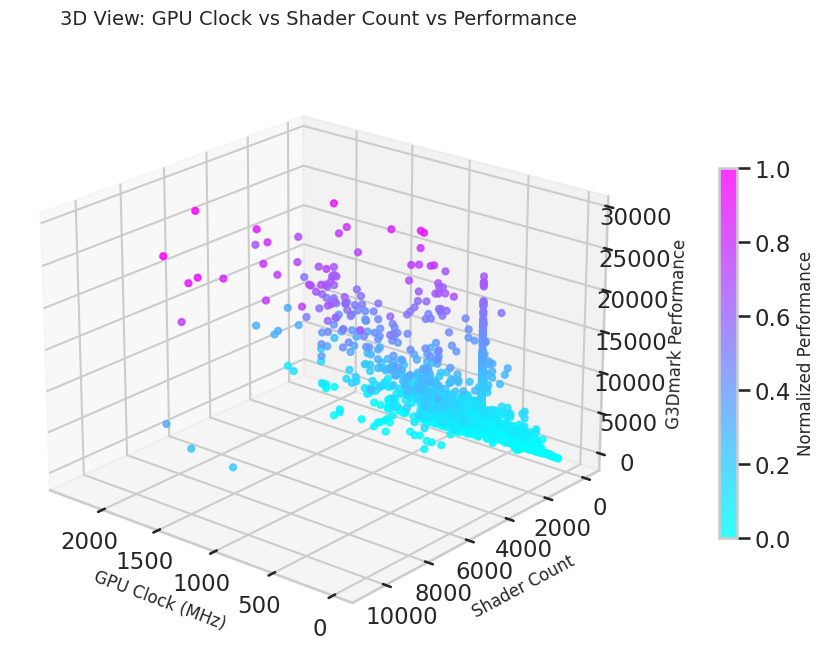

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

norm_perf = (df['G3Dmark'] - df['G3Dmark'].min()) / (df['G3Dmark'].max() - df['G3Dmark'].min())

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['gpuClock'],
    df['unifiedShader'],
    df['G3Dmark'],
    c=norm_perf,
    cmap="cool",
    s=20,
    alpha=0.8
)

ax.set_xlabel("GPU Clock (MHz)", fontsize=12, labelpad=10)
ax.set_ylabel("Shader Count", fontsize=12, labelpad=10)
ax.set_zlabel("G3Dmark Performance", fontsize=12, labelpad=10)

ax.set_title("3D View: GPU Clock vs Shader Count vs Performance", fontsize=14, pad=15)


ax.view_init(elev=22, azim=130)


cbar = fig.colorbar(scatter, ax=ax, shrink=0.6, pad=0.1)
cbar.set_label("Normalized Performance", fontsize=12)

plt.show()

**Interpretation**

This 3D plot shows how GPU clock speed and shader count together influence overall performance (G3Dmark). The pattern is very clear:

Shader count has the strongest impact. As shader count rises, performance shoots upward almost like a staircase — GPUs with thousands of shaders consistently deliver high G3Dmark scores. Higher shader counts consistently yields higher G3Dmark scores. GPU clock speed also contributes to performance, but not as strongly; increases in clock speed only significantly boost performance when shader count is also high. In contrast, GPUs with low shader counts remain low-performing regardless of their clock speed.

Overall, the plot shows that high shader count combined with moderate-to-high clock speed results in the highest performance.


**RQ 2**

What is the relationship between GPU price and performance, and which GPUs offer the best performance-per-dollar value?

**2.1 Price vs G3Dmark**

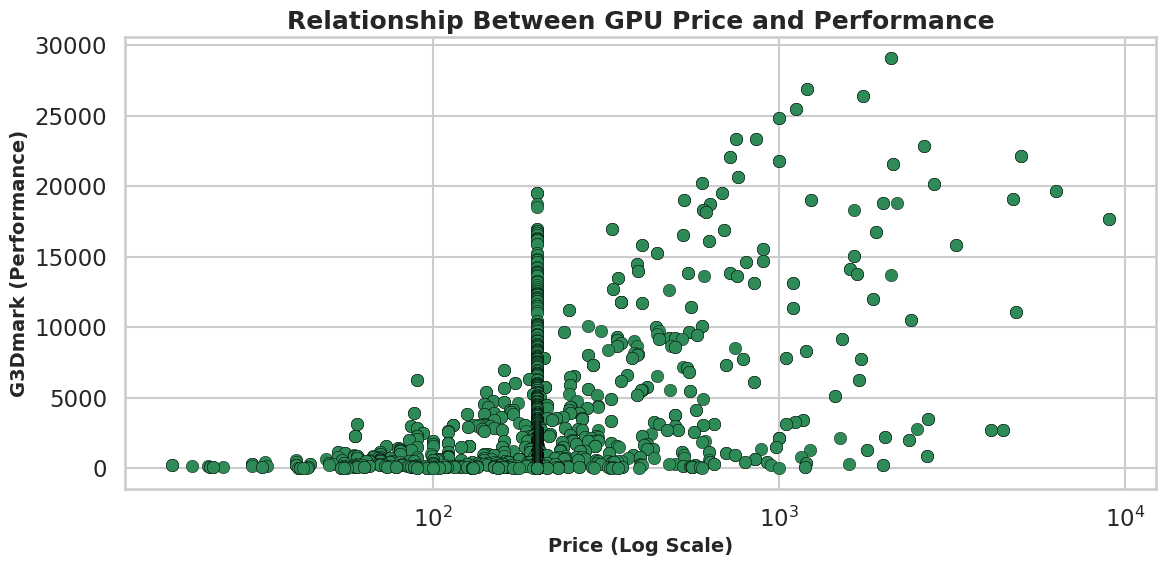

In [10]:
plt.figure(figsize=(12,6))
plt.xscale('log')
sns.scatterplot(data=df, x='price', y='G3Dmark', color='seagreen', edgecolor='black', linewidth=0.3)
plt.xlabel('Price (Log Scale)', fontsize=14, fontweight='bold')
plt.ylabel('G3Dmark (Performance)', fontsize=14, fontweight='bold')
plt.title('Relationship Between GPU Price and Performance', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

**Interpretation**

This plot examines how GPU price relates to overall performance (G3Dmark). The chart is slightly left-skewed and shows the strong and positive correlation between G3D mark and Price. i.e it shows the upward trend as more expensive GPUs tend to deliver higher performance. This is consistent with the typical structure of the GPU market, where flagship models command significantly higher prices.

However, the scatter also shows substantial variation. Clutered data points indicates many GPUs at similar price points exhibit very different performance levels, and some of outliers indicates several mid-priced models approach or exceed the performance of high-priced ones. This indicates that price alone is not a reliable predictor of performance; architectural efficiency, shader count, and memory configuration play major roles.

Overall, while higher-priced GPUs often perform better, the relationship is far from perfect — reminding us that in the GPU market, paying more does not always mean winning more.

**2.2 Top 20 GPUs by Value**



/tmp/ipython-input-755881550.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_gpuValue, x='gpuName', y='gpuValue', palette='crest',


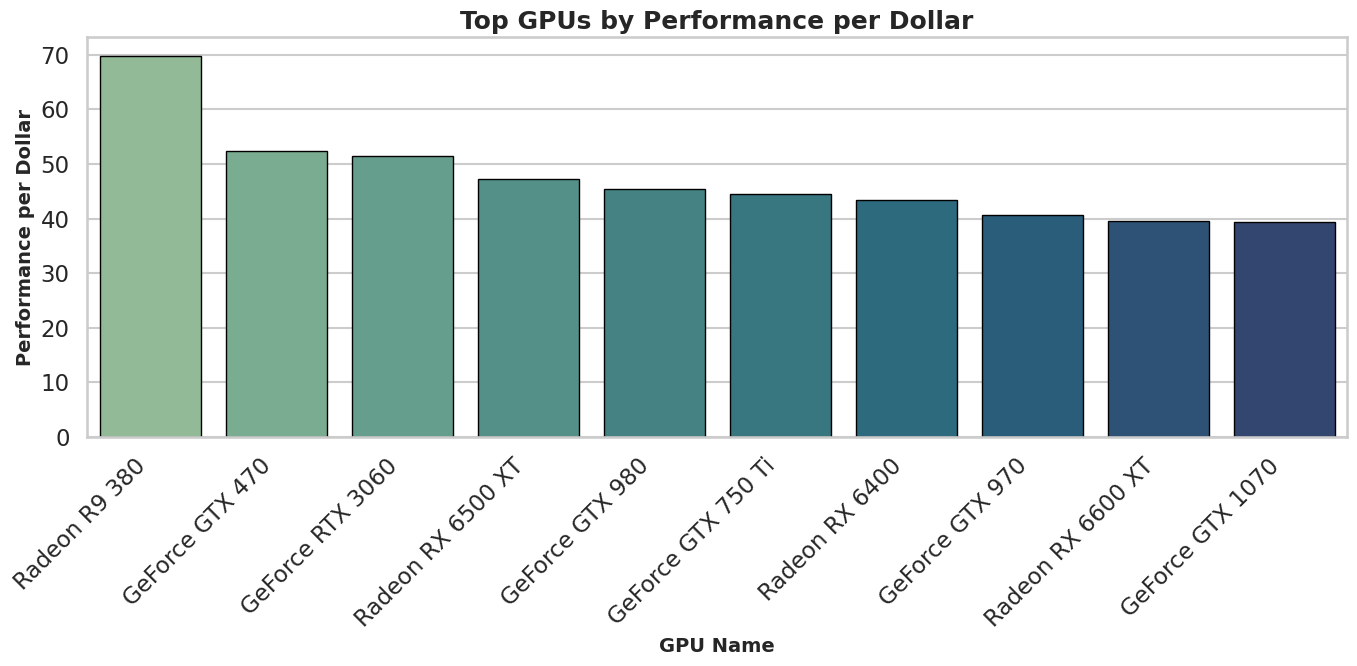

In [11]:
top_gpuValue = df.nlargest(20, 'gpuValue')
plt.figure(figsize=(14, 7))
sns.barplot(data=top_gpuValue, x='gpuName', y='gpuValue', palette='crest',
edgecolor='black', linewidth=1)
plt.xticks(rotation=45, ha='right')
plt.xlabel('GPU Name', fontsize=14, fontweight='bold')
plt.ylabel('Performance per Dollar', fontsize=14, fontweight='bold')
plt.title('Top GPUs by Performance per Dollar', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

**Interpretation:**

This chart is right-skewed and unimodal, compares the top GPUs based on their performance per dollar, highlighting which models offer the strongest value for money. The Radeon R9 380 stands out clearly, delivering the highest performance per dollar among all GPUs shown. Several older or mid-range models, such as the GeForce GTX 470 and RTX 3060, also provide strong value, indicating that high efficiency is not limited to the latest or most expensive cards.

Overall, the pattern suggests that a higher price does not automatically translate to better value. Many moderately priced GPUs achieve excellent performance relative to their cost, making them strong options for budget-conscious users. In simple terms, some GPUs deliver “champion-level” performance without requiring a premium budget.

**RQ 3**

 How does power consumption (TDP) relate to performance and efficiency?

**3.1 TDP vs Price**

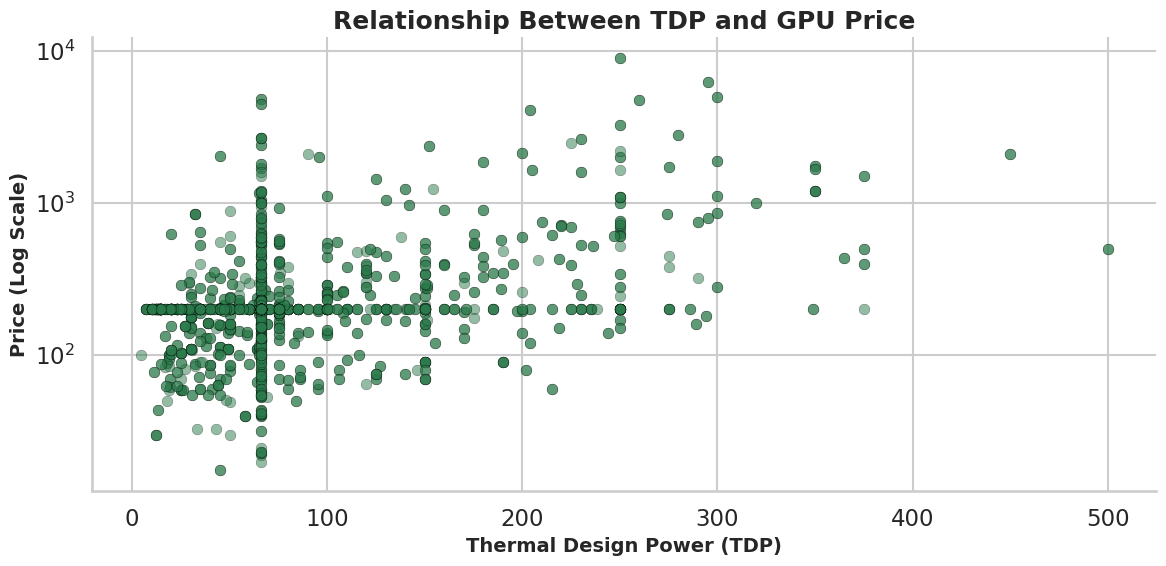

In [12]:
plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df,
    x='TDP',
    y='price',
    color='#2b7a4b',
    alpha=0.5,
    s=60,
    edgecolor='black',
    linewidth=0.3
)

# Log scale helps handle extreme GPU prices cleanly
plt.yscale('log')

plt.xlabel('Thermal Design Power (TDP)', fontsize=14, fontweight='bold')
plt.ylabel('Price (Log Scale)', fontsize=14, fontweight='bold')
plt.title('Relationship Between TDP and GPU Price', fontsize=18, fontweight='bold')

sns.despine()
plt.tight_layout()
plt.show()

**Interpretation**

This plot explores the relationship between GPU power consumption (TDP) and price. Even after applying a log scale to account for extreme price variations, the data shows a very weak and inconsistent correlation between the two variables. The trend is slightly positive—higher TDP GPUs sometimes cost more—but the relationship is weak and not reliable.

GPUs with similar TDP values span a wide price range, from low-cost models to high-end premium cards, confirming that TDP alone does not determine price. Instead, key factors such as architecture, memory size, performance level, and product generation have a much stronger influence on market cost.

Overall, the correlation between TDP and price is weak positive, indicating that while power consumption may rise with higher-end models, it is not a meaningful predictor of GPU pricing. Other specification-driven features play a far more significant role.

**3.2 TDP vs G3Dmark (with regression line)**

/usr/local/lib/python3.12/dist-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Relationship Between TDP and GPU Performance')

<Figure size 1200x600 with 0 Axes>

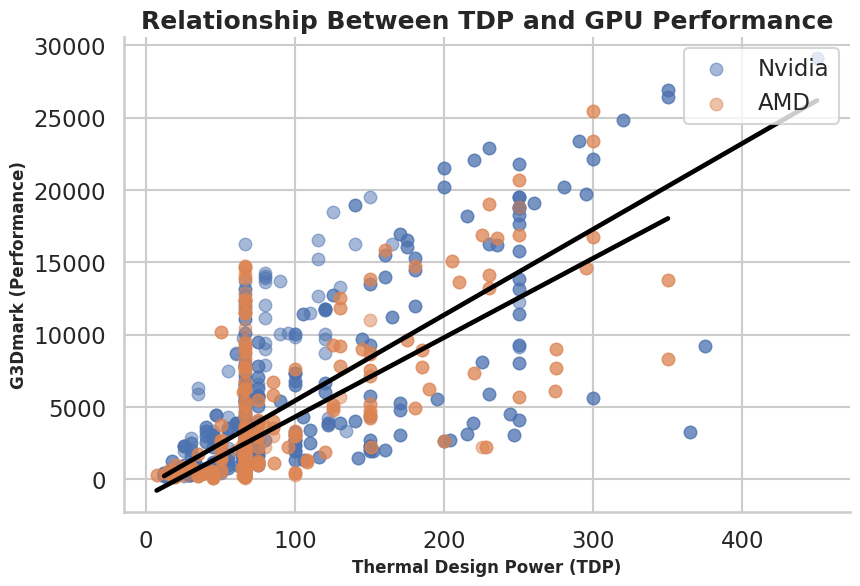

In [13]:
plt.figure(figsize=(12,6))
df_filtered = df[df['Manufacturer'].isin(['Nvidia', 'AMD'])]
sns.lmplot(
    data=df_filtered,
    x ='TDP',
    y='G3Dmark',
    hue='Manufacturer', legend = True,
    line_kws ={'color':'black'}, ci =None, scatter_kws = {'alpha':0.5},
    height=6, aspect=1.5,
    legend_out=False
    )

plt.legend(loc='upper right')
plt.xlabel('Thermal Design Power (TDP)',fontsize=12,fontweight='bold')
plt.ylabel('G3Dmark (Performance)',fontsize=12,fontweight='bold')
plt.title('Relationship Between TDP and GPU Performance', fontsize=18, fontweight='bold')

**Interpretation**

The scatter plot indicates a positive and fairly strong correlation between Thermal Design Power (TDP) and GPU performance (G3DMark). In general, GPUs with higher TDP tend to deliver higher performance.

A notable pattern appears in the 50–100 TDP range, where many data points are clustered—primarily from AMD. These GPUs achieve moderate performance at relatively low power consumption, which is typically desirable from an efficiency standpoint.

In contrast, Nvidia GPUs show wider dispersion across the full TDP spectrum, including several high-performance outliers at significantly higher TDP levels. Although these points strengthen the positive trend, they also indicate that Nvidia’s performance gains often come with higher power consumption, making them less power-efficient compared to AMD’s lower-TDP cluster.

Overall, while higher TDP correlates with better performance, the qualitative value depends on efficiency:
AMD demonstrates competitive performance at lower TDP, whereas Nvidia achieves top performance but at the cost of higher power demand.
Additionally, higher TDP often accompanies higher performance, but it is not a perfect predictor — it simply tells us how “power-hungry” the GPU is, not how well it is built.



**3.3 Top GPUs Ranked by Performance per Watt**

/tmp/ipython-input-1921397830.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


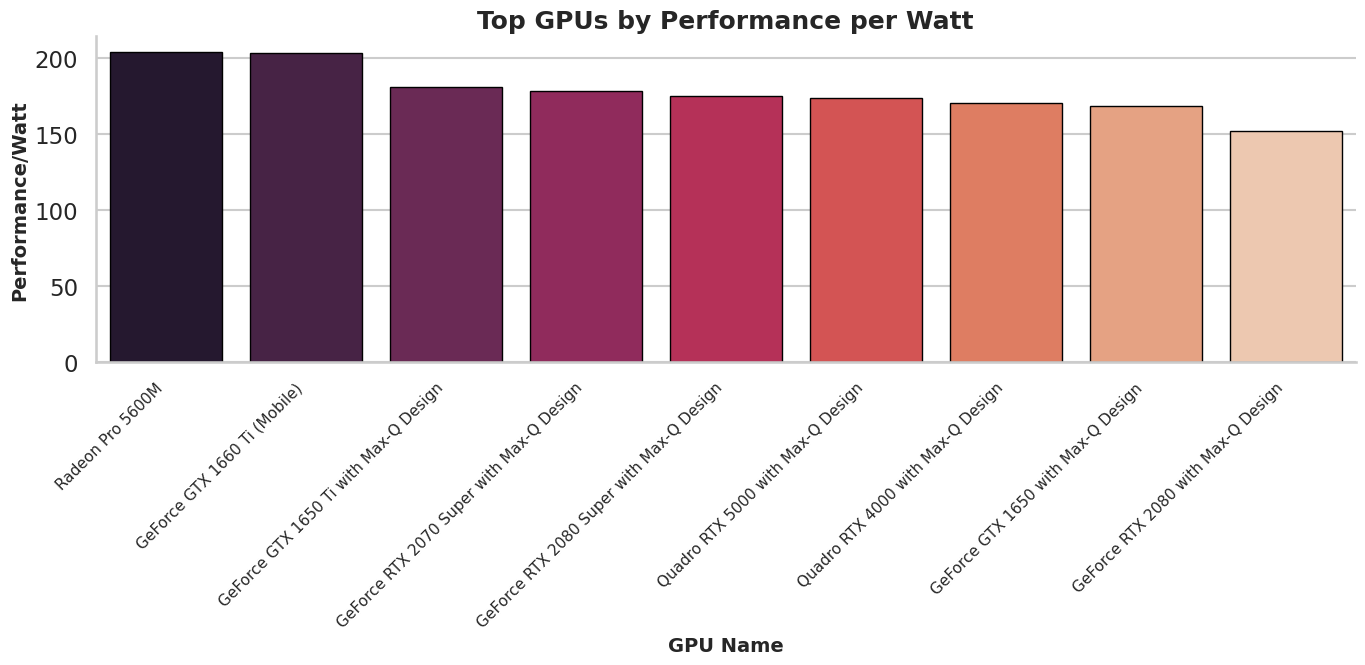

In [ ]:
plt.figure(figsize=(14, 7))

top_perf_per_power = df.nlargest(10, 'powerPerformance')

sns.barplot(
    data=top_perf_per_power,
    x='gpuName',
    y='powerPerformance',
    palette='rocket',
    edgecolor='black',
    linewidth=1
)

plt.xticks(rotation=45, ha='right', fontsize=11)
plt.xlabel('GPU Name', fontsize=14, fontweight='bold')
plt.ylabel('Performance/Watt', fontsize=14, fontweight='bold')
plt.title('Top GPUs by Performance per Watt', fontsize=18, fontweight='bold')

sns.despine()
plt.tight_layout()
plt.show()


**Interpretation**


This chart is unimodal and right-skewed identifies the GPUs with the highest performance per watt, showing which models deliver the most computational output for the power they consume. The Radeon Pro 5600M leads the list followed by Geforce GTX 1600 Ti(Mobile), indicating exceptional efficiency relative to its energy usage.

Most of the remaining top performers belong to NVIDIA’s Max-Q lineup, which is optimized for power-efficient laptop design.

The overall pattern shows that the most efficient GPUs are not always the most powerful ones. Instead, efficiency tends to come from GPUs designed with power optimization as a priority. This makes these models ideal for laptops and energy-sensitive environments.

**RQ-4**

 Are newer GPUs (based on release year) showing consistent improvements in performance and efficiency trends over time?

**4.1 Performance Trend by Release Year**

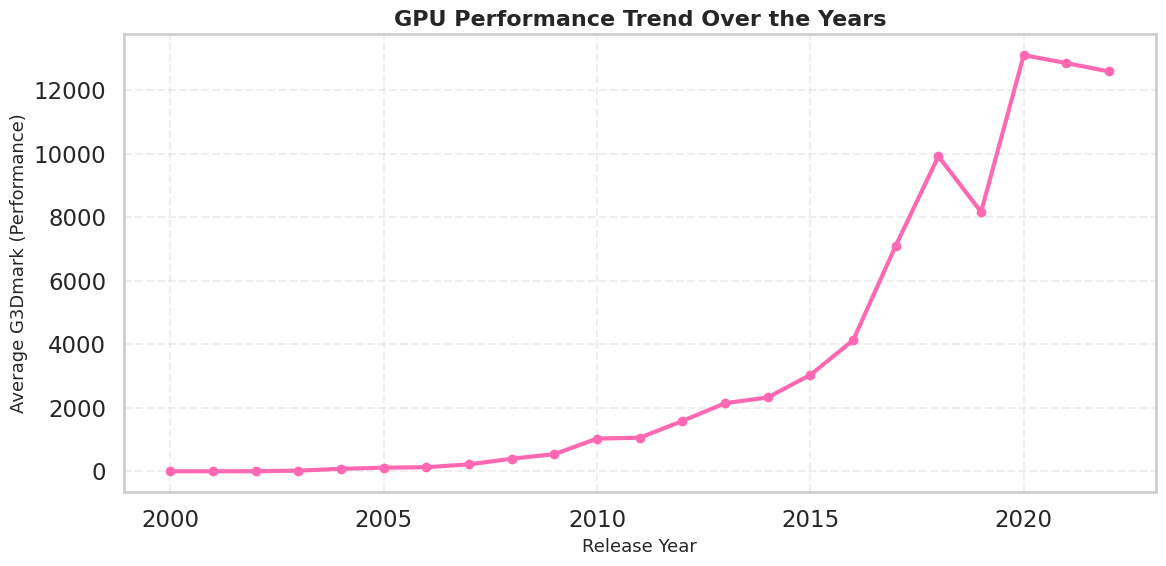

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(
    df.groupby('releaseYear')['G3Dmark'].mean(),
    color="hotpink",
    linewidth=3,
    marker='o',
    markersize=6
)

plt.title("GPU Performance Trend Over the Years", fontsize=16, fontweight='bold')
plt.xlabel("Release Year", fontsize=13)
plt.ylabel("Average G3Dmark (Performance)", fontsize=13)

plt.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

**Interpretation**

The line chart is left skewed with unimodality shows a strong upward trajectory in GPU performance over the last two decades. Between 2000 and 2010, performance rises slowly—GPUs are improving, but they’re still warming up.

After 2015, the trend shoots upward dramatically. This aligns with major architectural leaps where GPUs suddenly learned to stop crawling and start flying.

Around 2018–2020, performance nearly explodes, showing spikes indicating the fastest acceleration in the entire timeline. The plot clearly demonstrates continuous, accelerating growth, which mirrors real-world leaps in gaming, AI, and high-performance computing.

**RQ-5**

 How do different manufacturers (NVIDIA and AMD) compare in terms of average performance and efficiency?

**5.1 Manufacturer Comparison (NVIDIA vs AMD)**

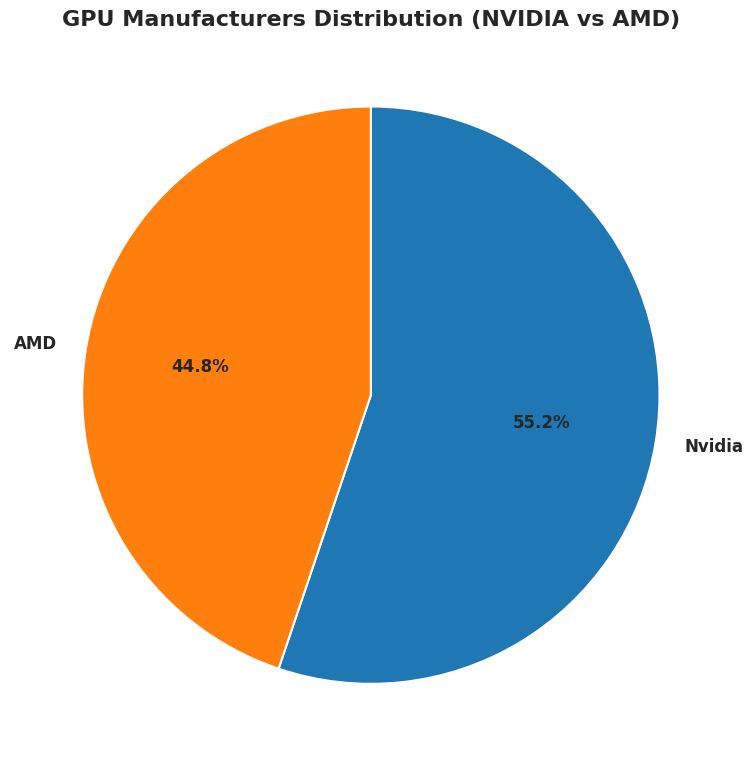

In [ ]:
filtered = df[df['Manufacturer'].isin(['Nvidia', 'AMD'])]

type1 = filtered['Manufacturer'].value_counts()

plt.figure(figsize=(8,8))

plt.pie(
    type1,
    labels=type1.index,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    colors=["#1f77b4", "#ff7f0e"],   # NVIDIA: blue, AMD: orange
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

plt.title('GPU Manufacturers Distribution (NVIDIA vs AMD)', fontsize=16, fontweight='bold')
plt.tight_layout()

**Interpretation**

This chart shows the distribution of GPUs in the dataset. NVIDIA represents a slightly larger share of the dataset compared to AMD, but the difference is small. Both manufacturers are well represented, giving a balanced view for comparison in later analyses.

**6. Predictive Modeling (Optional Insight)**

In [ ]:
# Target
y = df['G3Dmark']

#Independent Variables
X = df[['memSize', 'memBusWidth', 'gpuClock', 'memClock',
        'unifiedShader', 'tmu', 'rop', 'TDP', 'price']]
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)

# Extract coefficients
model = pipeline.named_steps['model']
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coef_df

R² Score: 0.7011984446105188
RMSE: 2317.6468518683587


,Feature,Coefficient
0,memSize,1824.604818
7,TDP,1042.704238
4,unifiedShader,659.849996
6,rop,362.883531
2,gpuClock,293.530048
3,memClock,-17.971286
1,memBusWidth,-113.630441
5,tmu,-283.729795
8,price,-296.918933


The linear regression model does a good job of explaining GPU performance, capturing about 70% of what makes one GPU faster than another. This means the hardware features we selected are genuinely meaningful.

Looking at the coefficients, memory size stands out as the biggest driver of performance. GPUs with more VRAM simply handle larger workloads and run modern games and applications much more efficiently.

The next major contributor is TDP (how much power the GPU can use). Higher-power GPUs usually contain more cores, larger cooling systems, and stronger internal components — so it makes sense that they perform better.

Shader count, ROPs, and GPU clock speed also push performance upward. Shaders do the bulk of the rendering work, ROPs handle final pixel output and clock speed affects how fast everything runs.
They matter, but their influence is more modest compared to VRAM and power.

Some features — like memory clock, memory bus width, TMU, and even price — have small negative coefficients. This doesn’t mean they're bad; it simply means these features overlap with others. In technical terms, the model sees them as redundant information, so it doesn’t treat them as strong, independent predictors (a classic case of multicollinearity).

Overall, the regression model tells a straightforward story: A GPU performs well when it has plenty of memory, enough power to use its hardware fully, and a solid number of processing units (shaders and ROPs).

These results match how GPUs are designed in real life and provide a clear, intuitive picture of what makes one GPU stronger than another.

**Conclusion**

This project set out to identify which hardware features most strongly influence GPU performance. The analysis consistently showed that memory size and power availability (TDP) are the biggest contributors, followed by key architectural elements like shader count, ROP units, and GPU clock speed. Together, these features explain about 70% of the variation in GPU performance, showing that the selected specifications are meaningful predictors.



**Limitations and future improvements**

Some features showed weak or negative coefficients due to overlap between components (multicollinearity), highlighting a limitation of using simple linear regression. The model also cannot fully capture non-linear relationships or account for missing real-world factors such as architecture generation, cooling, or driver optimizations.

Overall, the project met its objective by clearly identifying the main drivers of GPU performance. Future improvements could include using more advanced machine learning models, adding architectural metadata, and exploring nonlinear interactions to improve prediction accuracy.

This study demonstrates how data analytics can help summarize GPU evolution, efficiency, and performance in a clear, data-driven manner.

**References**

1. Kaggle Dataset: GPU Benchmarks — https://www.kaggle.com/datasets/alanjo/gpu-benchmarks

2. Kaggle Dataset: Graphics Card Full Specs — https://www.kaggle.com/datasets/alanjo/graphics-card-full-specs

3. Manufacturer Resources: NVIDIA & AMD technical specification sheets.

4. Python Libraries: Pandas, NumPy, Matplotlib, Seaborn.
